## Explorary Data Analysis

In [3]:
import pickle, pathlib, numpy as np, os, gzip, shutil, json, textwrap
from pathlib import Path
import pickle, numpy as np, gzip, shutil, json, textwrap
import pickle, numpy as np, pathlib, re, random, math
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd


In [4]:
# paths
base = Path("/Users/ashley/Desktop/ml2-final")
paths = [base/"train.pickle", base/"valid.pickle", base/"test.pickle"]
data_list = []
for p in paths:
    with open(p,'rb') as f:
        data_list.append(pickle.load(f, encoding='latin1'))

# keys intersection
common_keys = set.intersection(*[set(d.keys()) for d in data_list])

combined = {}
for k in common_keys:
    combined[k] = np.concatenate([d[k] for d in data_list], axis=0)

# save combined
out_path = base/"/Users/ashley/Desktop/ml2-final/all_data.pickle"
with open(out_path,'wb') as f:
    pickle.dump(combined, f, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
banner_yellow = "#FFD25C"

## 1. each signs overview percentage distribution

Data shape: (51839, 32, 32, 3) Labels shape: (51839,)
   class_id  count
0         0    270
1         1   2940
2         2   3000
3         3   1860
4         4   2640


,class_id,count
0,0,270
1,1,2940
2,2,3000
3,3,1860
4,4,2640
5,5,2490
6,6,570
7,7,1890
8,8,1860
9,9,1950


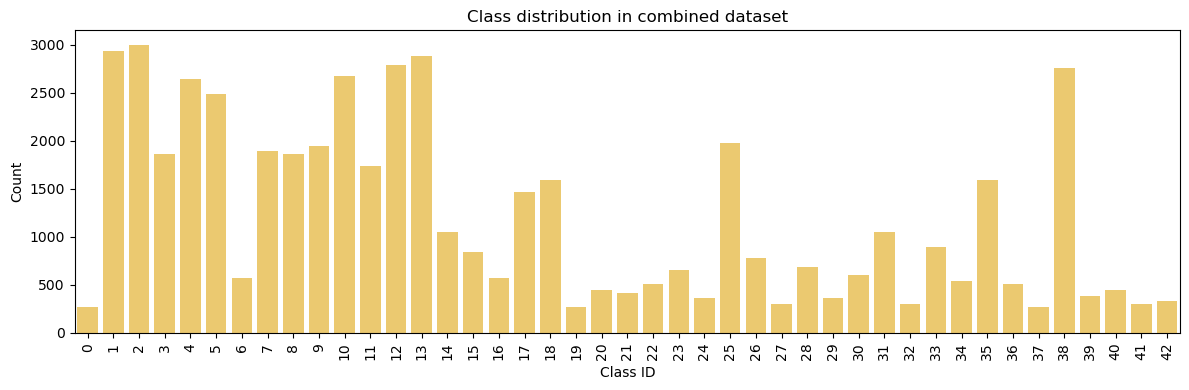

In [ ]:
import pickle, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, pathlib, random, matplotlib

path = pathlib.Path('/Users/ashley/Desktop/ml2-final/all_data.pickle')
with open(path, 'rb') as f:
    data = pickle.load(f, encoding='latin1')

X = data['features']
y = data['labels']
print("Data shape:", X.shape, "Labels shape:", y.shape)

n_classes = len(np.unique(y))
counts = pd.Series(y).value_counts().sort_index()

df_counts = counts.reset_index().rename(columns={'index': 'class_id'})
print(df_counts.head())          
display(df_counts)               
plt.figure(figsize=(12, 4))
sns.barplot(x=counts.index, y=counts.values,color=banner_yellow)
plt.xticks(rotation=90)
plt.title('Class distribution in combined dataset')
plt.xlabel('Class ID')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
import pickle, pathlib, json, numpy as np, pandas as pd

base = pathlib.Path("/Users/ashley/Downloads")
labels_path = base / "labels.pickle"

with open(labels_path, 'rb') as f:
    lbl = pickle.load(f, encoding='latin1')

print("Top-level type:", type(lbl))
if isinstance(lbl, dict):
    print("dict keys:", lbl.keys())
    for k,v in lbl.items():
        print(k, type(v), getattr(v,'shape',None) if hasattr(v,'shape') else f"len={len(v)}")
        break
else:
    try:
        print("Length:", len(lbl))
        print("First 10:", lbl[:10])
    except Exception as e:
        print("Cannot show length; error:", e)


Top-level type: <class 'list'>
Length: 43
First 10: ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing']


In [5]:
label_names = pickle.load(open('/Users/ashley/Downloads/labels.pickle','rb'), encoding='latin1')


### 2. Randomly selected an example of each class 

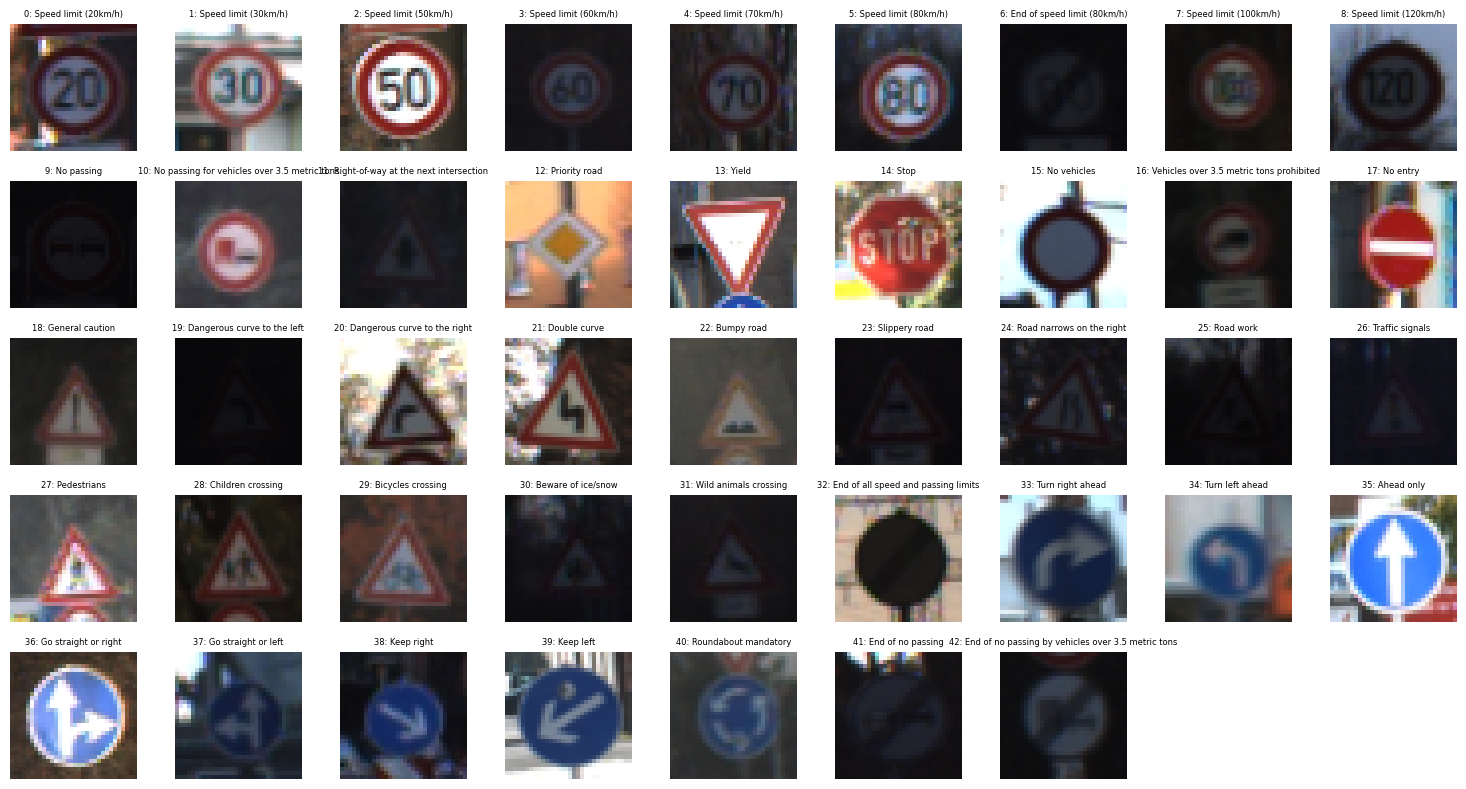

In [ ]:
import numpy as np, matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
for cls in range(len(label_names)):
    idx = np.random.choice(np.where(y == cls)[0])
    img = X[idx]

    plt.subplot(5, 9, cls + 1)        
    plt.imshow(img)
    plt.title(f'{cls}: {label_names[cls]}', fontsize=6)
    plt.axis('off')

plt.tight_layout()

plt.show()


### 2.1 image shape checks

In [10]:
unique_shapes = {img.shape for img in X}
print(unique_shapes)   # should be exactly {(32,32,3)}


{(32, 32, 3)}


## 2. shape distribution

In [ ]:
import numpy as np
import pandas as p
df = pd.DataFrame({'class_id': y})         
df['label'] = df['class_id'].map(dict(enumerate(label_names)))

circle_ids   = list(range(0, 9)) + [9,10,15,16,17,32,33,34,35,36,37,38,39,40,41,42] 
triangle_ids = [18,19,20,21,22,23,24,25,26,27,28,29,30,31]  
octagon_ids  = [14]                                          
diamond_ids  = [12]                                       
# other_ids    = [32,36,37,38,39,40,41,42]                 

shape_map = {cid:'circle'   for cid in circle_ids} | \
            {cid:'triangle' for cid in triangle_ids} | \
            {cid:'octagon'  for cid in octagon_ids} | \
            {cid:'diamond'  for cid in diamond_ids}

df['shape'] = df['class_id'].map(shape_map)

red_ids    = [0,1,2,3,4,5,6,7,8,   
              9,10,11,13,14,15,16,17,    
              18,19,20,21,22,23,24,25,26,27,28,29,30,31] 
blue_ids   = [33,34,35,36,37,38,39,40] 
grey_ids   = [32,41,42]                
yellow_ids = [12]                      
color_map = {cid: 'red'    for cid in red_ids}
color_map.update({cid: 'blue'   for cid in blue_ids})
color_map.update({cid: 'grey'   for cid in grey_ids})
color_map.update({cid: 'yellow' for cid in yellow_ids})

df['color'] = df['class_id'].map(color_map).fillna('other')


digit_ids = list(range(0,9)) + [7,8]
df2 = df['class_id'].isin(digit_ids).astype(int)


pivot = df.pivot_table(index='shape', columns='color', values='class_id', aggfunc='count').fillna(0)
print(pivot)



color       blue   grey      red  yellow
shape                                   
circle    7409.0  930.0  25020.0     0.0
diamond      0.0    0.0      0.0  2790.0
octagon      0.0    0.0   1050.0     0.0
triangle     0.0    0.0  10020.0     0.0


## 3. shape distribution

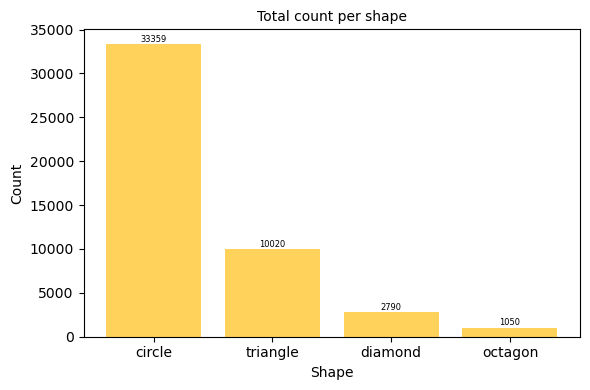

In [ ]:
df = pd.DataFrame({'class_id': y})
df['shape'] = df['class_id'].map(shape_map)         
df['label'] = df['class_id'].map(dict(enumerate(label_names)))

shape_counts = df['shape'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(6,4))
plt.bar(shape_counts.index, shape_counts.values, color=banner_yellow)
plt.title('Total count per shape',fontsize=10)
plt.xlabel('Shape'); plt.ylabel('Count')
for i,v in enumerate(shape_counts.values):
    plt.text(i, v+10, str(v), ha='center', va='bottom', fontsize=6)
plt.tight_layout()
plt.show()



- Circles make up the majority of the samples (over 60%), followed by triangles. Diamond and octagon shapes are significantly underrepresented.

- Implication for model training is shaping imbalance may cause the CNN to underperform on rare shapes, like octagons (e.g., STOP signs).

## 4. color distribution

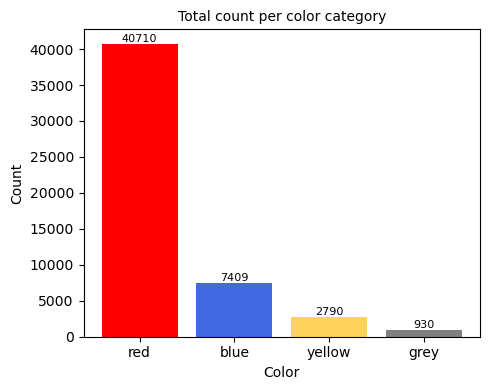

In [72]:
df = pd.DataFrame({'class_id': y})
df['color'] = df['class_id'].map(color_map).fillna('other')   # red / blue / other

color_counts = df['color'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(5,4))
plt.bar(color_counts.index, color_counts.values, color=['red','royalblue',banner_yellow,'gray'])
plt.title('Total count per color category',fontsize=10)
plt.xlabel('Color'); plt.ylabel('Count')
for i,v in enumerate(color_counts.values):
    plt.text(i, v+10, str(v), ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()

- Red signs dominate the dataset, making up the vast majority of samples. This imbalance could lead to a CNN model that is biased toward detecting red-colored signs more accurately than others.

- Implication for model training is considering color-based augmentation (e.g., hue shifting or grayscale conversion) to prevent overfitting to dominant colors.

## 5. Digit presence on the traffic signal

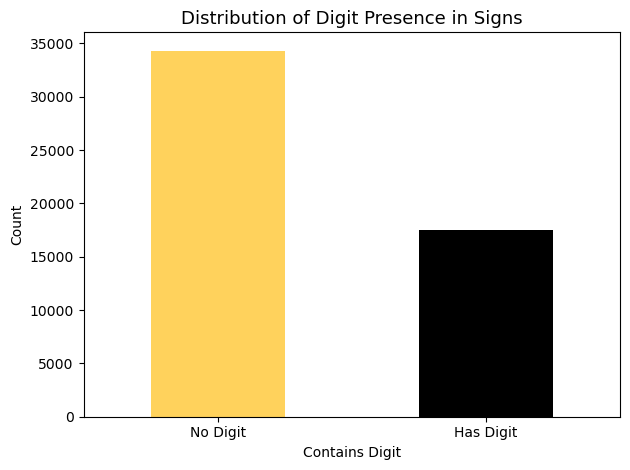

In [85]:
df2_named = df2.replace({0: 'No Digit', 1: 'Has Digit'})
counts = df2_named.value_counts()

colors = ['#FFD25C' if label == 'No Digit' else 'black' for label in counts.index]

counts.plot(kind='bar', color=colors)
plt.title('Distribution of Digit Presence in Signs',fontsize=13)
plt.ylabel('Count'); plt.xlabel('Contains Digit')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



- This bar chart shows the distribution of traffic signs based on whether they contain numerical digits
- Roughly two-thirds of the signs do not contain digits, suggesting an imbalance in visual content types.

## 6. Brightness distribution

### 6.1 Each class brighness & darkness count and percentage

Absolute count

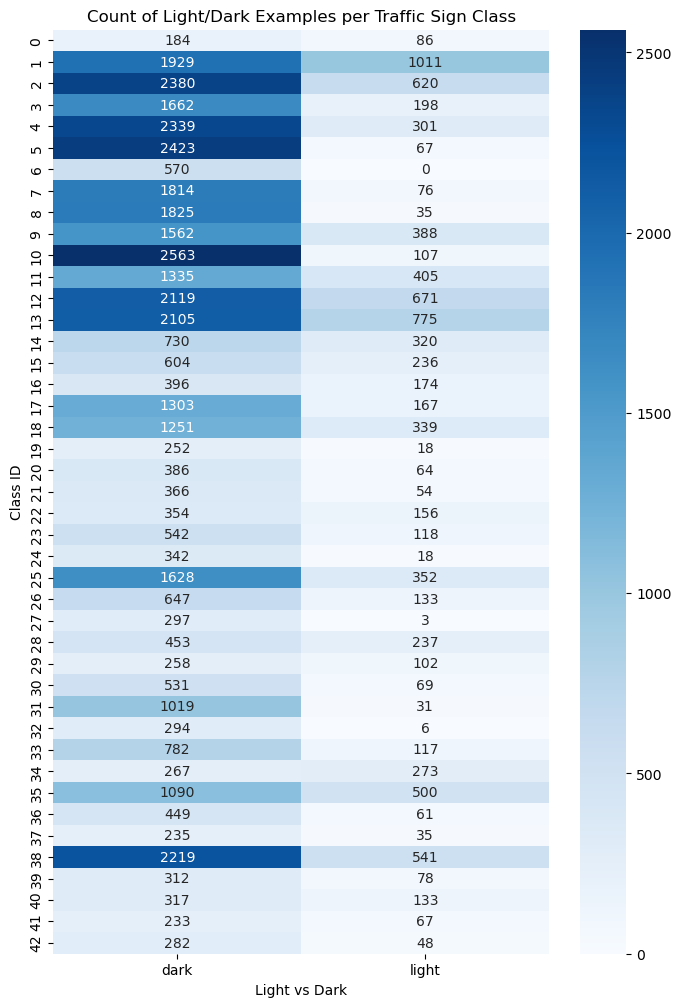

In [ ]:

def brightness_from_array(arr):
    gray = 0.299*arr[...,0] + 0.587*arr[...,1] + 0.114*arr[...,2]
    return gray.mean()

brightness = np.array([brightness_from_array(img) for img in X])
is_light = brightness > 127

df = pd.DataFrame({
    'class_id':    y,
    'brightness':  brightness,
    'light_flag':  np.where(is_light, 'light', 'dark')
})

counts = df.groupby(['class_id','light_flag']).size().unstack(fill_value=0)

plt.figure(figsize=(8,12))
sns.heatmap(counts, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Class ID')
plt.xlabel('Light vs Dark')
plt.title('Count of Light/Dark Examples per Traffic Sign Class')
plt.show()


In [ ]:
df_pct = counts.copy()
df_pct['dark_pct']  = df_pct['dark']  / (df_pct['dark']  + df_pct['light'])
df_pct['light_pct'] = df_pct['light'] / (df_pct['dark']  + df_pct['light'])


Percentage

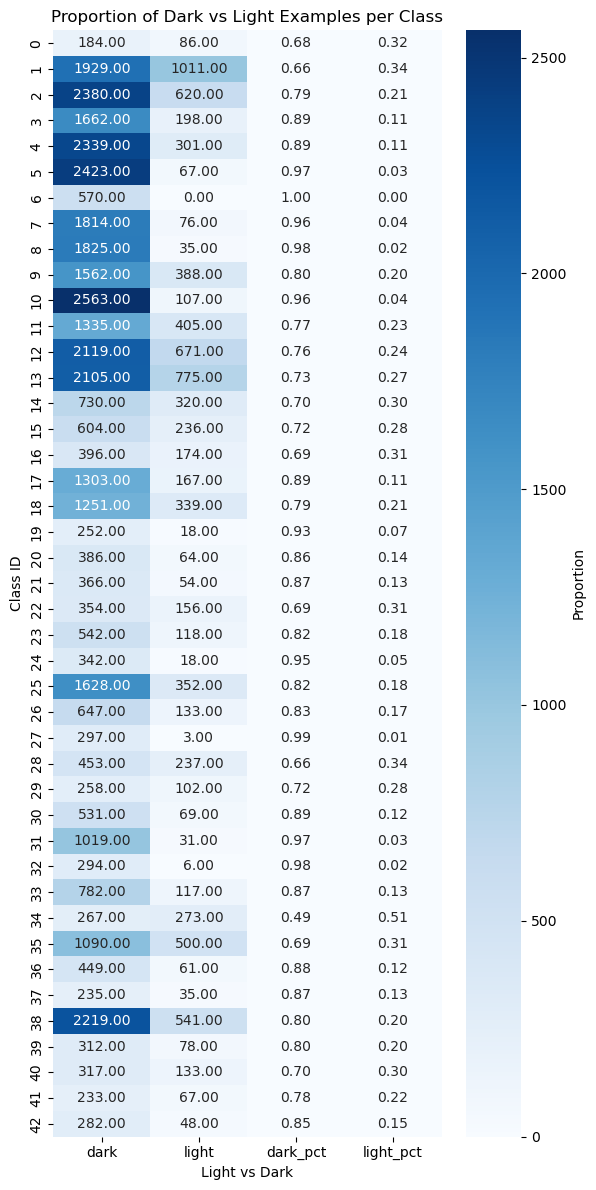

In [ ]:
plt.figure(figsize=(6, 12))  
sns.heatmap(
    df_pct,
    annot=True,              
    fmt=".2f",             
    cmap="Blues",           
    cbar_kws={'label': 'Proportion'}  
)
plt.title("Proportion of Dark vs Light Examples per Class")
plt.ylabel("Class ID")
plt.xlabel("Light vs Dark")
plt.tight_layout()
plt.show()


Since class ID = `8` has the highest percentage of darkness, I would like to look at the sample in details

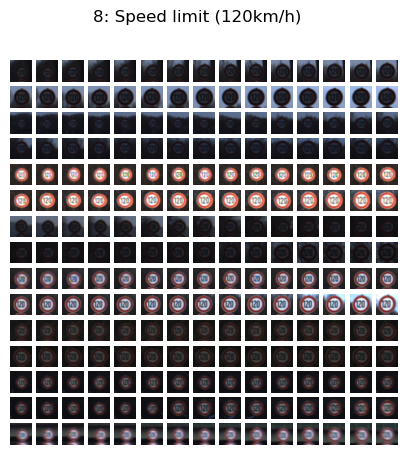

In [90]:
def show_examples(cid, n=225):
    idx = np.where(y == cid)[0][:n]
    plt.figure(figsize=(5,5))
    for i,j in enumerate(idx):
        plt.subplot(15,15,i+1); plt.imshow(X[j]); plt.axis('off')
    plt.suptitle(f'{cid}: {label_names[cid]}'); plt.show()
show_examples(8)     


### 6.3 Total brightness distribution

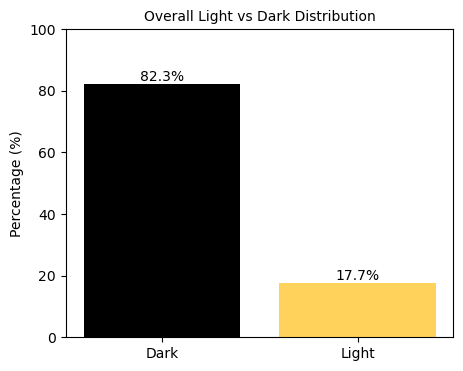

In [ ]:
totals = df_pct[['dark','light']].sum()           
percent = totals / totals.sum() * 100 
plt.figure(figsize=(5,4))
plt.bar(['Dark','Light'], percent, color=['black',banner_yellow])
plt.ylabel('Percentage (%)')
plt.title('Overall Light vs Dark Distribution',fontsize=10)
plt.ylim(0,100)
for i, v in enumerate(percent):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')
plt.show()


- This bar chart compares the overall percentage of traffic sign images captured in dark vs. light conditions. It shows a clear imbalance, with over 80% of the data collected under dark conditions.
- This skewed brightness distribution highlights the need to address potential performance issues in light-condition generalization. 

### 7. Pixel value display

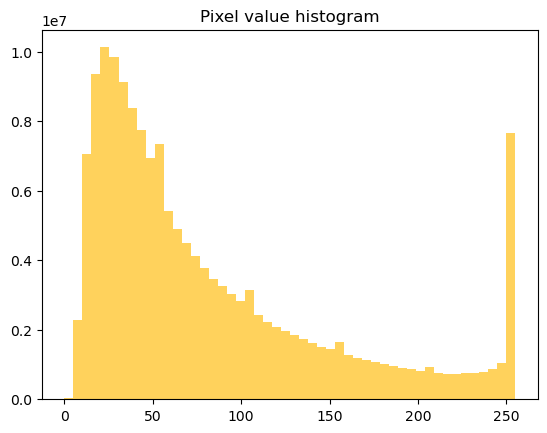

In [48]:
plt.hist(X.flatten(), bins=50, color=banner_yellow); plt.title('Pixel value histogram', color='black'); plt.show()


- This histogram shows the overall distribution of pixel values across the dataset. The skew toward low values and a sharp spike near 255 suggests many dark images and some with high brightness.
- This insight informs the need for brightness normalization or contrast enhancement during preprocessing, which can help CNNs better generalize across lighting conditions.